In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Online Retail.xlsx")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [3]:
# Remove rows with Quantity <= 0
df = df[df['Quantity'] > 0]

In [4]:
# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [5]:
# Convert data into the appropriate format for the Apriori algorithm
# Grouping by InvoiceNo and Description to create the basket of items
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [6]:
# Display the first few rows of the basket
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def encode_unit_price(x):
    if x >= 1:
        return 1
    return 0

# Apply the encoding function to the basket data
basket_sets = basket.applymap(encode_unit_price)

# Display the first few rows of the encoded basket
basket_sets.head()

/tmp/ipykernel_1677/925245059.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_unit_price)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pivot_table = basket_sets.T.dot(basket_sets)

# Display the co-occurrence matrix
pivot_table.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,36,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
50'S CHRISTMAS GIFT BAG LARGE,0,109,1,1,0,0,0,28,0,2,...,0,0,0,2,0,5,0,0,0,0
DOLLY GIRL BEAKER,0,1,133,2,0,1,1,2,0,6,...,0,0,1,2,0,3,0,1,0,0
I LOVE LONDON MINI BACKPACK,0,1,2,68,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
I LOVE LONDON MINI RUCKSACK,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizing the Frequency of Items:

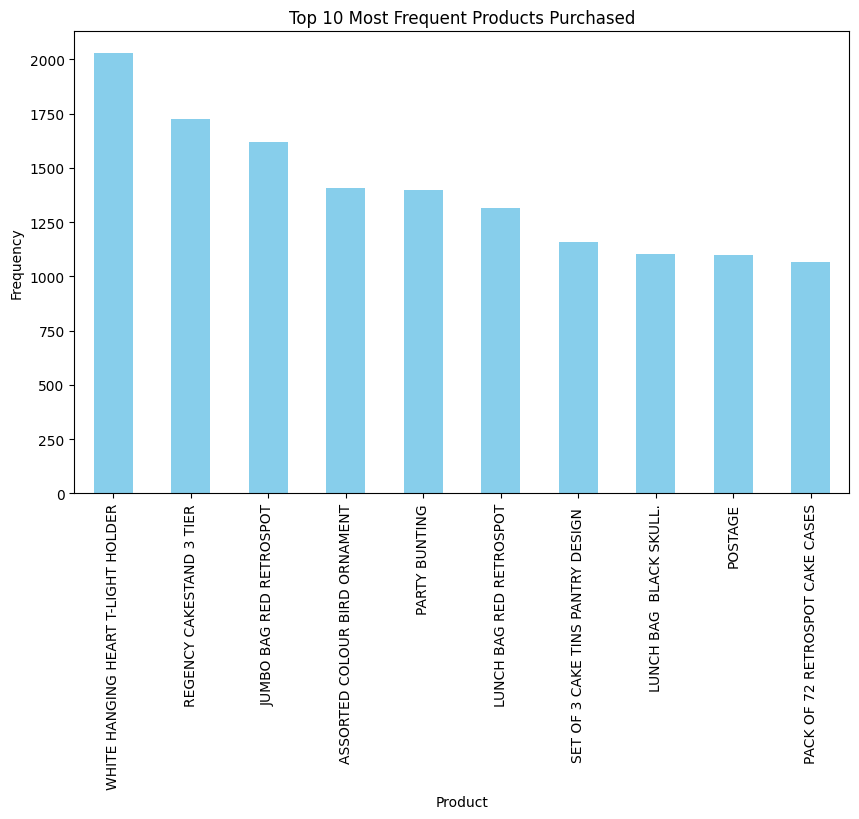

In [9]:
import matplotlib.pyplot as plt

# Count the frequency of each product
product_counts = df['Description'].value_counts().head(10)

# Plot the top 10 most frequent products
plt.figure(figsize=(10,6))
product_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Products Purchased')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Advanced Visualization with Plotly:

In [10]:
import plotly.express as px

# Plotly interactive bar chart for top products
fig = px.bar(product_counts, x=product_counts.index, y=product_counts.values, title="Top 10 Most Frequent Products", labels={'x': 'Product', 'y': 'Frequency'})
fig.show()

### Line chart: Monthly Sales Trend:

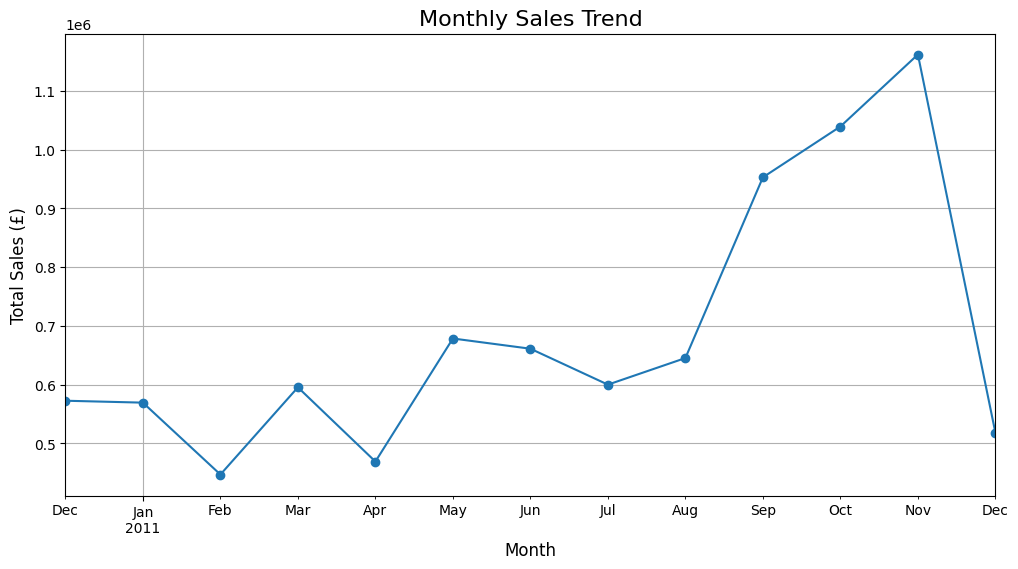

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by month and sum sales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period("M"))['TotalPrice'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (£)", fontsize=12)
plt.grid(True)
plt.show()


### Pie chart: Share of each country in total sales:

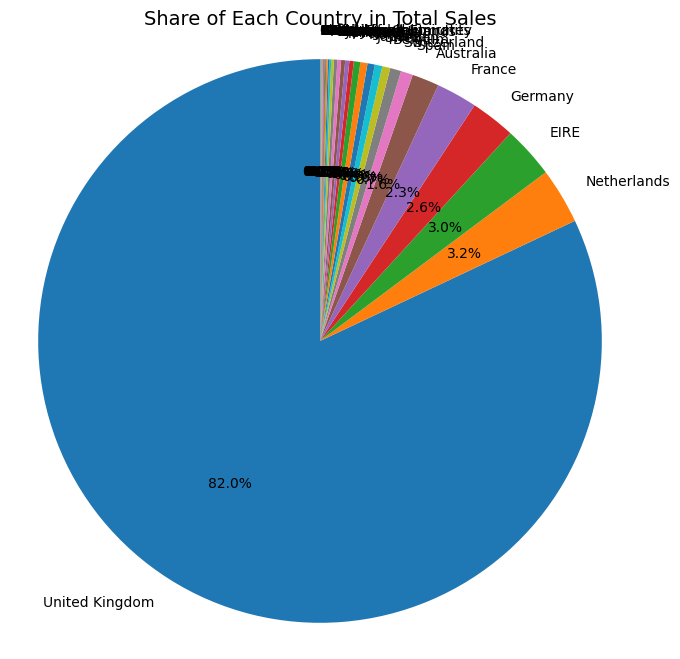

In [17]:
import matplotlib.pyplot as plt
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group sales by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,8))
plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Share of Each Country in Total Sales", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures circle shape
plt.show()


### Heatmap: Co-purchase frequency of top 20 products (before Apriori):

/tmp/ipykernel_1677/4193693911.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



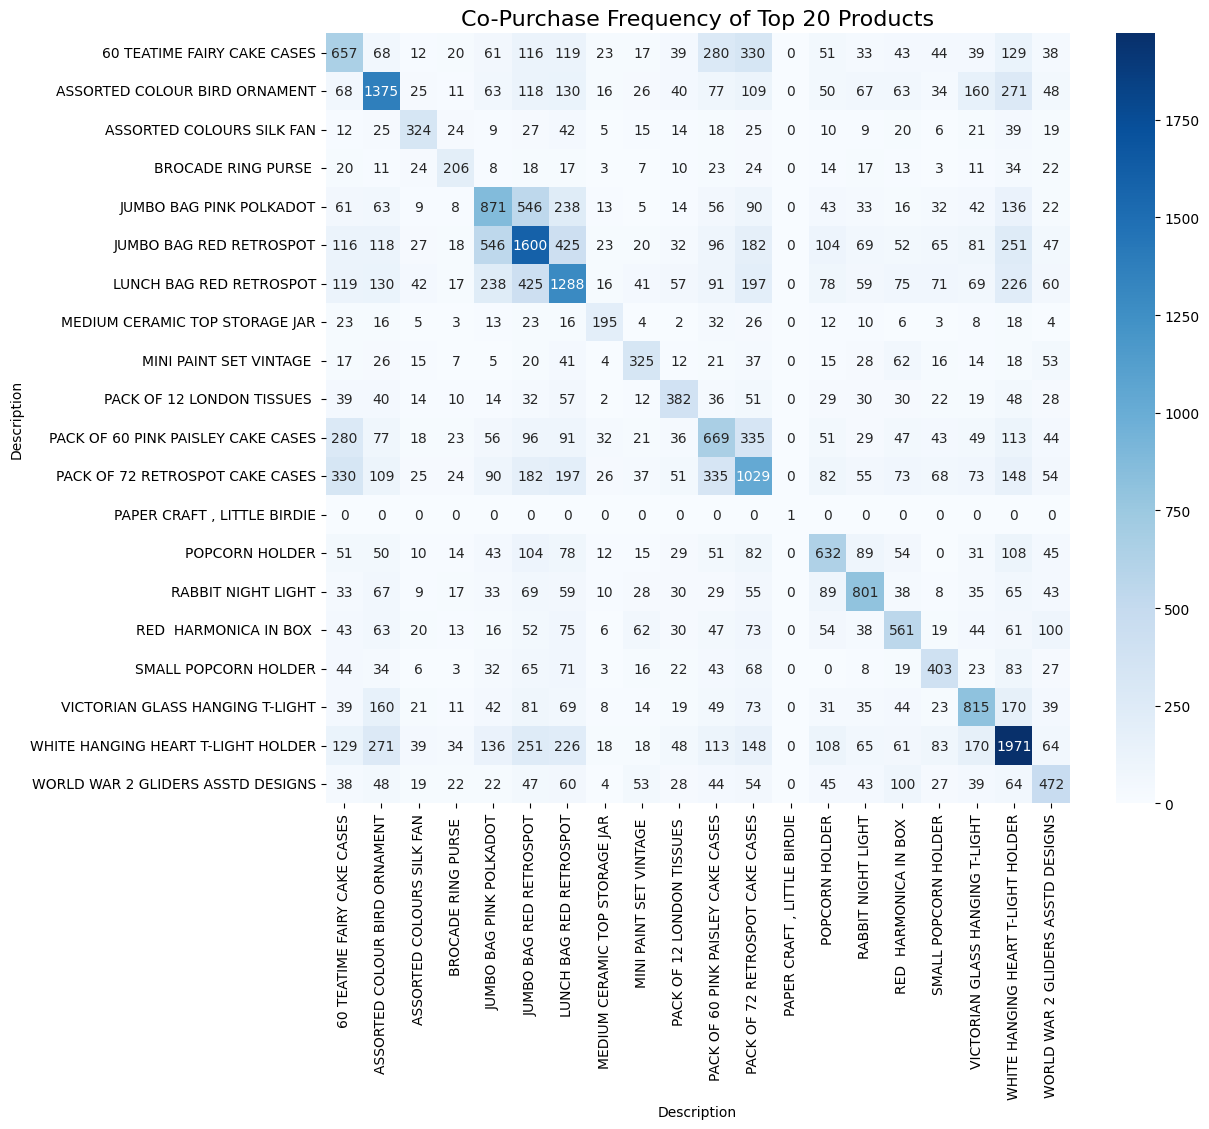

In [18]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20).index
df_top = df[df['Description'].isin(top_products)]
basket = (df_top
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum()
          .unstack()
          .fillna(0))

# Convert to binary (1 if product is purchased, 0 otherwise)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

co_purchase = basket.T.dot(basket)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(co_purchase, annot=True, fmt='g', cmap='Blues')
plt.title("Co-Purchase Frequency of Top 20 Products", fontsize=16)
plt.show()


### Area chart: Monthly cumulative sales comparison year-over-year

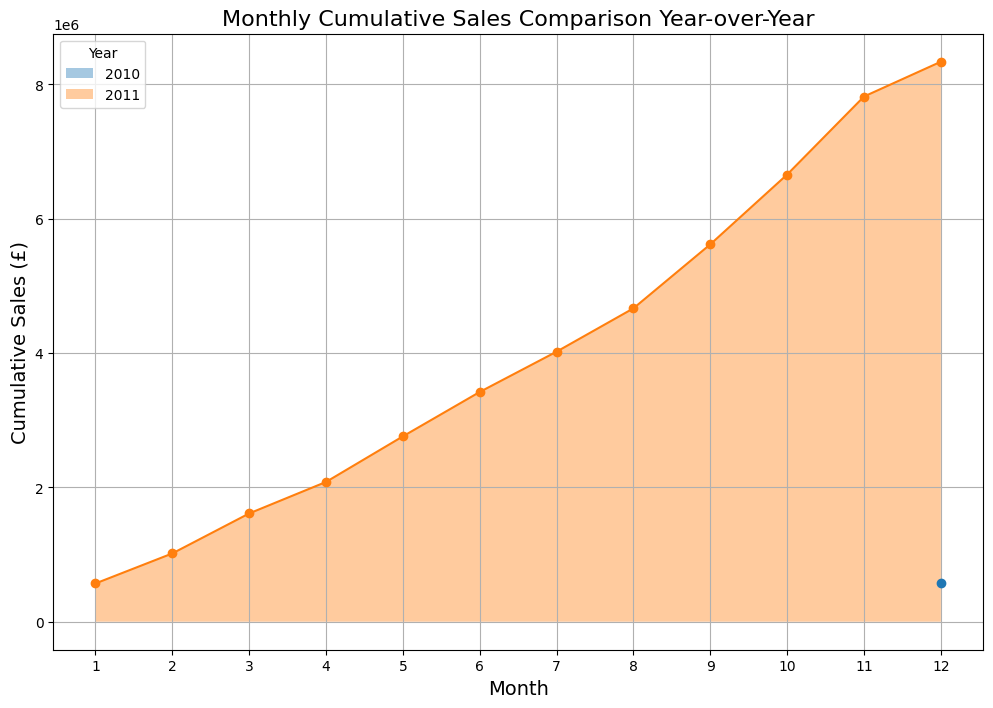

In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])
monthly_sales['CumulativeSales'] = monthly_sales.groupby('Year')['TotalPrice'].cumsum()

plt.figure(figsize=(12, 8))

for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.fill_between(data['Month'], data['CumulativeSales'], alpha=0.4, label=str(year))
    plt.plot(data['Month'], data['CumulativeSales'], marker='o')

plt.title('Monthly Cumulative Sales Comparison Year-over-Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cumulative Sales (£)', fontsize=14)
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

### Descriptive Statistics:

In [11]:
df.describe()
df['Country'].value_counts()
df['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: count, dtype: int64

### Country Analysis:

In [12]:
# Number of transactions per country
df['Country'].value_counts()


Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


###  Customer and Transaction Overview:

In [13]:
# Number of unique customers
df['CustomerID'].nunique()

# Number of unique transactions
df['InvoiceNo'].nunique()


18536

###  Sales Analysis:

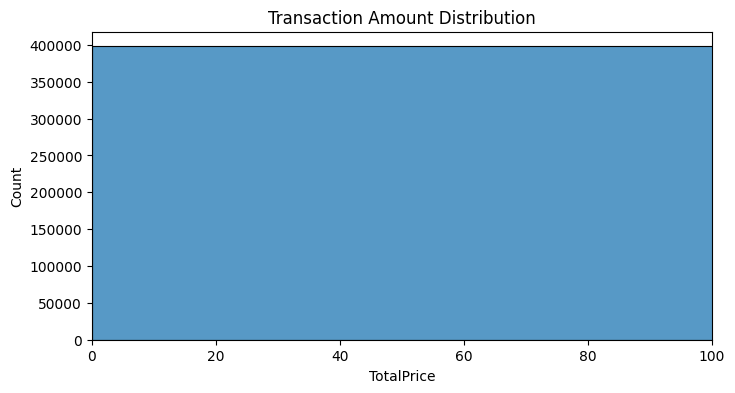

In [14]:
# Create total price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Summary statistics for total sales
df['TotalPrice'].describe()

# Plot transaction amount distribution
plt.figure(figsize=(8,4))
sns.histplot(df['TotalPrice'], bins=50)
plt.xlim(0, 100)  # limit for better visualization
plt.title("Transaction Amount Distribution")
plt.show()


### Top-Selling Products:


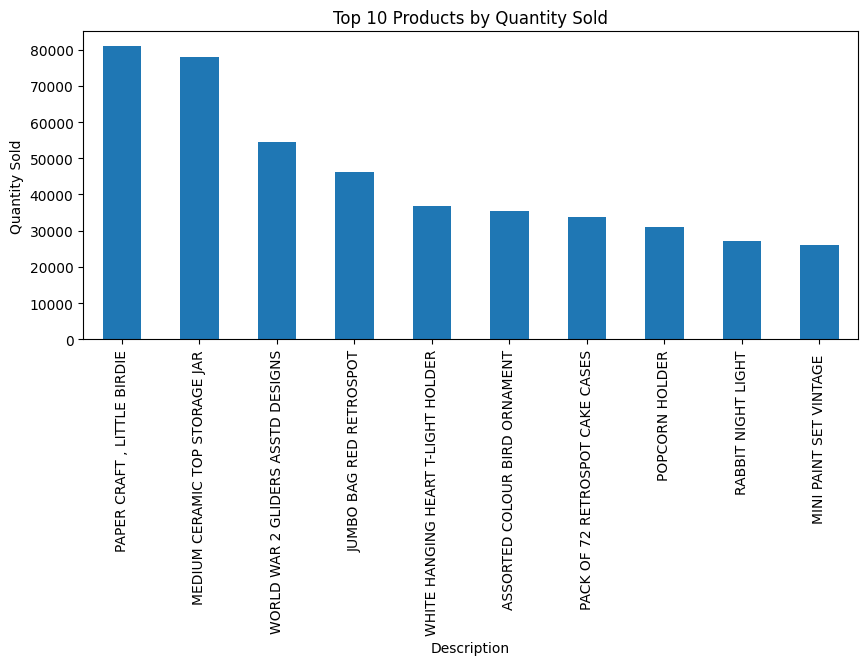

In [15]:
# Group by description and sum quantities
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top products
top_products.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.show()


### Monthly Sales Prediction Using Random Forest Regression:



In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [24]:
# Calculate total price if not already present
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [25]:
# Extract year and month from invoice date
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [26]:
# Aggregate monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()


In [27]:
# Create lag feature: sales of previous month
monthly_sales['Prev_Month_Sales'] = monthly_sales['TotalPrice'].shift(1)

In [28]:
# Drop the first row with NaN lag value
monthly_sales = monthly_sales.dropna()

In [29]:
# Define features and target variable
X = monthly_sales[['Year', 'Month', 'Prev_Month_Sales']]
y = monthly_sales['TotalPrice']

In [30]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [31]:
# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# Predict on test set
y_pred = model.predict(X_test)

In [33]:
# Evaluate model performance using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 282288.46


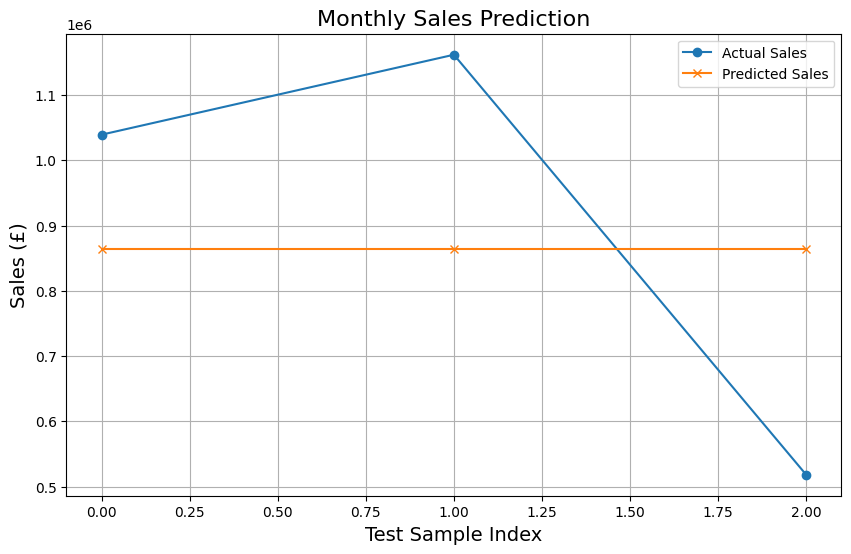

In [34]:
# Plot actual vs predicted sales
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x')
plt.title('Monthly Sales Prediction', fontsize=16)
plt.xlabel('Test Sample Index', fontsize=14)
plt.ylabel('Sales (£)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()